In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), _ = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [4]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [6]:
train_imAges_with_zero_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

Now lets train the model from chapter two on both of these training sets

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [9]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7007 - loss: 1.0133 - val_accuracy: 0.9038 - val_loss: 0.3132
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9121 - loss: 0.2894 - val_accuracy: 0.9469 - val_loss: 0.1800
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9451 - loss: 0.1765 - val_accuracy: 0.9564 - val_loss: 0.1461
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9623 - loss: 0.1225 - val_accuracy: 0.9477 - val_loss: 0.1724
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.9640 - val_loss: 0.1210
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9795 - loss: 0.0648 - val_accuracy: 0.9605 - val_loss: 0.1467
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9851 - loss: 0.0477 - val_accuracy: 0.9541 - val_loss: 0.1638
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9896 - loss: 0.0335 - val_ac

In [10]:
model = get_model()
history_zero = model.fit(
    train_imAges_with_zero_channels, train_labels,
    epochs=10,
    batch_size = 128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8641 - loss: 0.4842 - val_accuracy: 0.9555 - val_loss: 0.1541
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9627 - loss: 0.1289 - val_accuracy: 0.9681 - val_loss: 0.1069
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9772 - loss: 0.0797 - val_accuracy: 0.9729 - val_loss: 0.0912
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9751 - val_loss: 0.0831
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9874 - loss: 0.0418 - val_accuracy: 0.9757 - val_loss: 0.0816
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9920 - loss: 0.0290 - val_accuracy: 0.9783 - val_loss: 0.0733
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9944 - loss: 0.0216 - val_accuracy: 0.9766 - val_loss: 0.0804
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9956 - loss: 0.0163 - val_accu

Lets compare how the validation accuracy of each model evolves over time.
Remember, the first concatenation of data is with noise, the second with zeros adds nothing of information to our data, we are only adding something. Human classification accuracy won't be affected by this transformation at all.

Side Note: dividing the original training data by 255 scales the pixel to range form 0 to 1. Remember the pixel is 0 = black to 255 = white, (grayscale).

In [11]:
import matplotlib.pyplot as plt


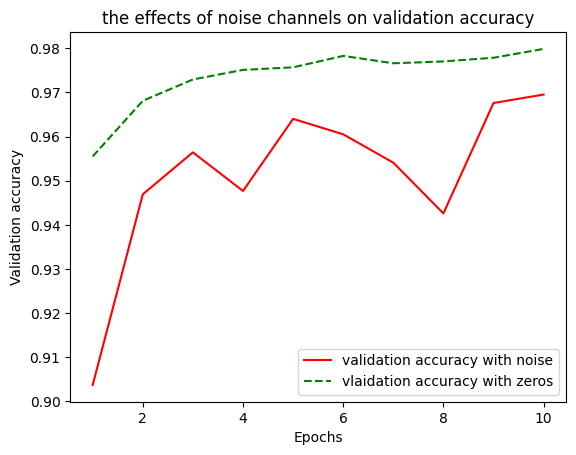

In [12]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zero = history_zero.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "r-",
         label="validation accuracy with noise")
plt.plot(epochs, val_acc_zero, "g--",
         label="vlaidation accuracy with zeros")
plt.title("the effects of noise channels on validation accuracy")
plt.xlabel("Epochs"); plt.ylabel("Validation accuracy")
plt.legend()
plt.show()

It can be seen from the plot above that despite the two data holding the same information, the validation accuracy of the data with noise is lower in accuracy of about 1% than the data with zeros. showing the fact that spurious data causes overfitting and, the more the noise channel, the further the accuracy will degrade.